<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Grid Search로 다양한 알고리즘 모델을 튜닝합니다.


# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# 기초통계량 확인
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# NaN 값 확인
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [7]:
# target 확인
target = 'medv'

# 데이터 분리
x = data.drop(target, axis = 1)
y = data[target] 

**2) 정규화**

In [8]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**3) 학습용, 평가용 데이터 분리**

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- GridSearchCV를 사용해 최선의 하이퍼파라미터를 갖는 모델을 만듭니다.
- 우선 사용할 모듈을 모두 불러옵니다.
- 평가 지표는 R2 Score를 사용합니다.

In [10]:
# 모듈 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

result = {}

## 4.1.Linear Regression

- GridSearchCV를 사용하지 않고 모델링합니다.

In [11]:
# 선언하기
model = LinearRegression()

In [12]:
# 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [13]:
# 예측하기
y_pred = model.predict(x_test)

In [14]:
# 평가하기
print(r2_score(y_test, y_pred))

0.7430693569118817


In [15]:
result['Linear Regression'] = r2_score(y_test, y_pred)

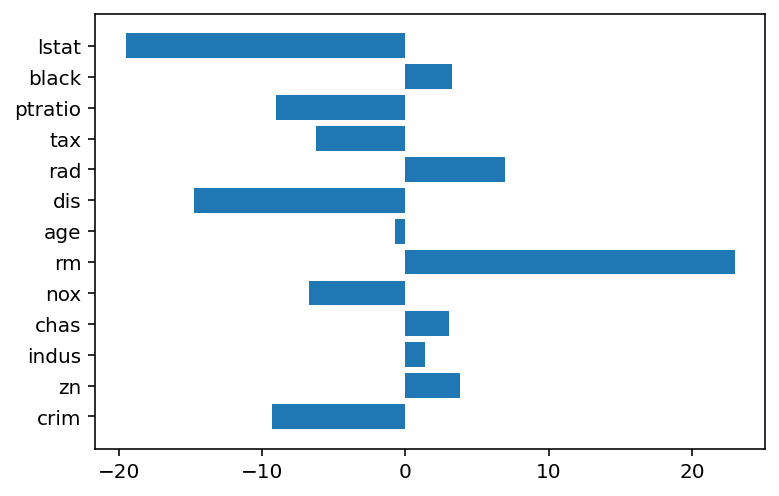

In [16]:
plt.barh(y=list(x), width=model.coef_.reshape(-1))
plt.show()

## 4.2.KNN

- 파라미터 
    - n_neighbors: range(1, 11)
- GridSearchCV 옵션
    - cv = 5
    - scoring = 'r2'

In [17]:
# 선언하기
model_knn = KNeighborsRegressor()

# 파라미터 선언
param = {'n_neighbors' : range(1, 11)}

# Grid Search 모델 선언하기
model = GridSearchCV(model_knn,
                     param,
                     cv=5,
                    scoring='r2')

In [18]:
# 학습하기
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 11)}, scoring='r2')

In [19]:
# 최적파라미터, 성능 확인
print(model.best_params_)
print(model.best_score_)

{'n_neighbors': 2}
0.7056738855252623


In [20]:
# 예측하기
y_pred = model.predict(x_test)

In [21]:
# 평가하기
print(r2_score(y_test, y_pred))

0.7856445290221904


In [22]:
result['KNN'] = r2_score(y_test, y_pred)

## 4.3.Decision Tree

- 파라미터
    - max_depth: range(1, 11)
- GridSearchCV 옵션
    - cv = 5
    - scoring = 'r2'

In [23]:
# 선언하기
model_tree = DecisionTreeRegressor(random_state=2022)

# 파라미터 선언
param = {'max_depth' : range(1, 11)}

# Grid Search 모델 선언하기
model = GridSearchCV(model_tree,
                     param,
                     cv=5,
                     scoring='r2')

In [24]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2022),
             param_grid={'max_depth': range(1, 11)}, scoring='r2')

In [25]:
# 최적파라미터, 성능 확인
print(model.best_params_)
print(model.best_score_)

{'max_depth': 5}
0.8015797587627989


In [26]:
# 예측하기
y_pred = model.predict(x_test)

In [27]:
# 평가하기
print(r2_score(y_test, y_pred))

0.7147610837328198


In [28]:
result['Decision Tree'] = r2_score(y_test, y_pred)

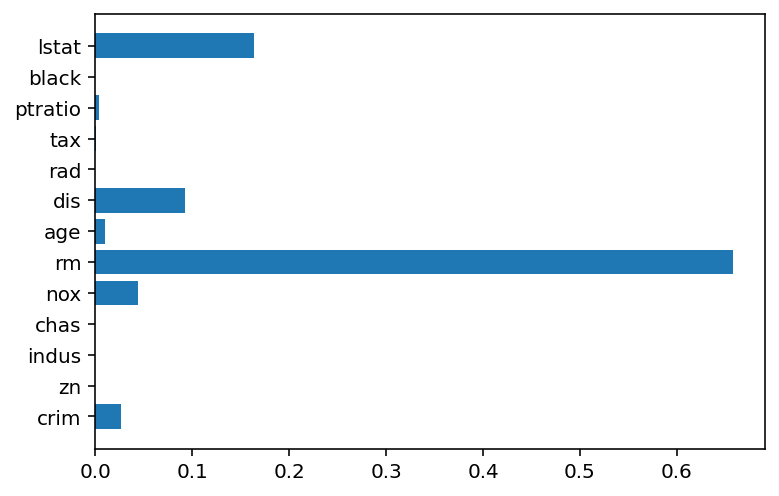

In [29]:
# 변수 중요도 시각화
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()

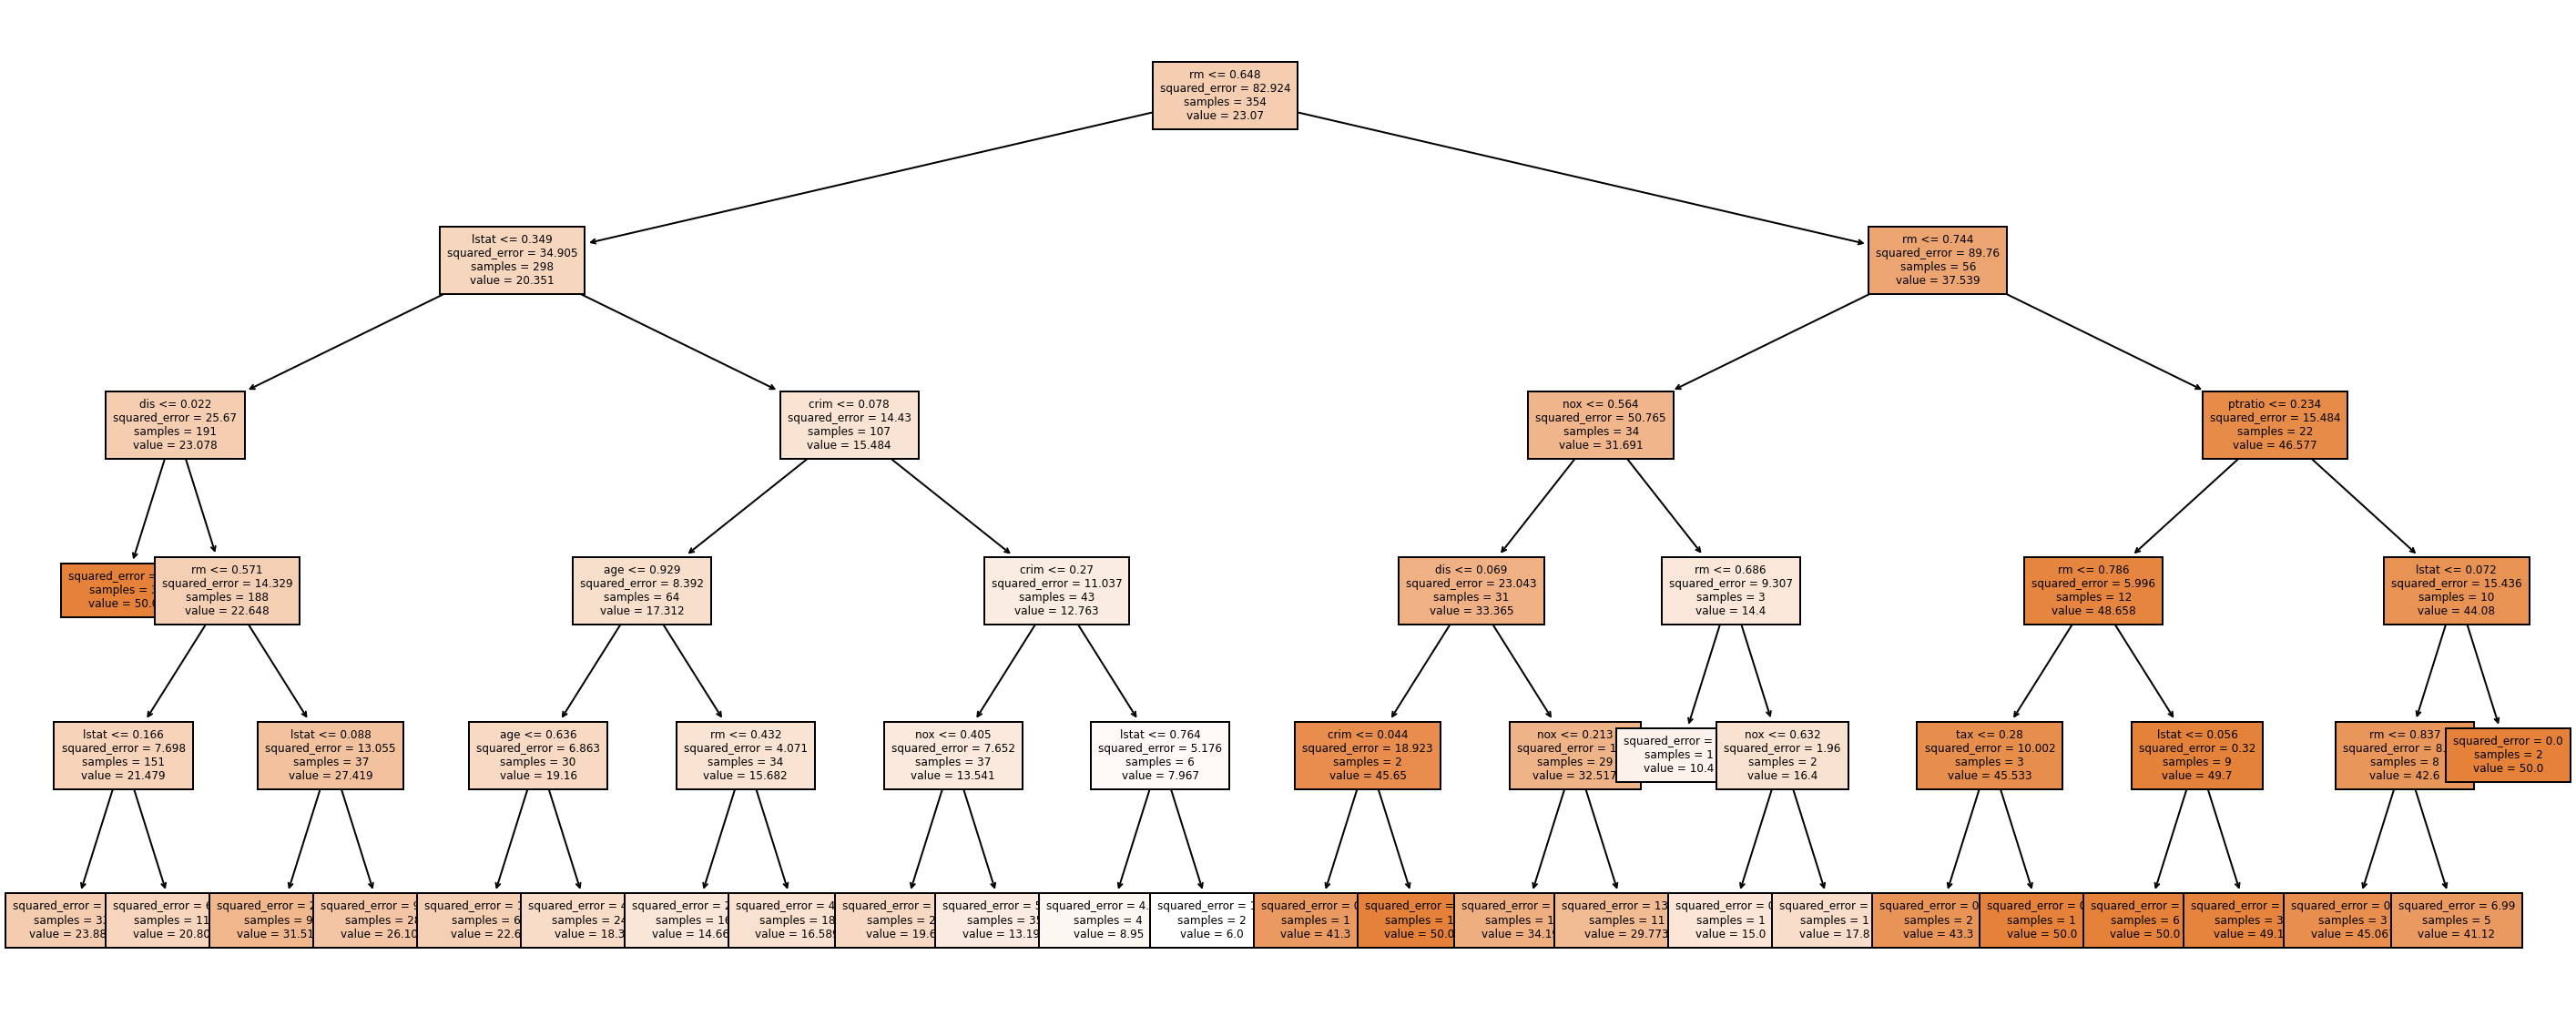

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))

plot_tree(model.best_estimator_,
          filled=True,
          feature_names=list(x),
          fontsize=6,
          )

plt.show()

## 4.4.SVM

- 파라미터
    - C: [1, 10, 100, 1000, 10000]
    - epsilon: [0.0001, 0.001, 0.01, 1, 10]
    - gamma: [0.0001, 0.001, 0.01, 1, 10]
- GridSearchCV 선언
    - cv = 5
    - scoring = 'r2'

In [31]:
# 선언하기
model_svm = SVR()

# 파라미터 선언
param = {'C' : [1, 10, 100, 1000, 10000],
         'epsilon' : [0.0001, 0.001, 0.01, 1, 10],
         'gamma': [0.0001, 0.001, 0.01, 1, 10]}

# Grid Search 모델 선언하기
model = GridSearchCV(model_svm,
                     param,
                     cv=5,
                     scoring='r2')

In [32]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'epsilon': [0.0001, 0.001, 0.01, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 1, 10]},
             scoring='r2')

In [33]:
# 최적파라미터, 성능 확인
print(model.best_params_)
print(model.best_score_)

{'C': 100, 'epsilon': 1, 'gamma': 1}
0.860323942543471


In [34]:
# 예측하기
y_pred = model.predict(x_test)

In [35]:
# 평가하기
print(r2_score(y_test, y_pred))

0.8730166112884127


In [36]:
result['SVM'] = r2_score(y_test, y_pred)

# 성능 비교

In [40]:
print('=' * 40)
print('R2 Score')
print('-' * 40)
for m_name, score in result.items() :
    print(m_name, ':', np.round(score, 3))
print('='*40)

R2 Score
----------------------------------------
Linear Regression : 0.743
KNN : 0.786
Decision Tree : 0.715
SVM : 0.873
